# 환경설정

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 경고 무시
import warnings
warnings.filterwarnings(action='ignore') 

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("gender_submission.csv")

# 데이터 확인

In [2]:
print(train.shape)    # (891, 12)
print(test.shape)     # (418, 11)
print(submission.shape)    # (418,2)

(891, 12)
(418, 11)
(418, 2)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [5]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


## train

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## test

In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## submission

In [8]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# 결측치 확인

열 설명

1. PassengerId: 각 승객에게 부여된 고유한 식별자.
2. Pclass (선실 등급): 1, 2, 3 중 하나로 표시된 선실 등급.
3. Name (이름): 승객의 이름.
4. Sex (성별): 남성 또는 여성.
5. Age (나이): 승객의 나이.
6. SibSp (동승한 형제자매 또는 배우자 수): 함께 탑승한 형제자매 또는 배우자의 수.
7. Parch (동승한 부모 또는 자녀 수): 함께 탑승한 부모 또는 자녀의 수.
8. Ticket (티켓 번호): 승객의 티켓 번호.
9. Fare (요금): 지불한 요금.
10. Cabin (선실 번호): 승객의 선실 번호.
11. Embarked (탑승 항구): C, Q, S 중 하나로 표시된 승객의 탑승 항구. (C = 쉘 부르크, Q = 퀸즈타운, S = 사우스햄튼)

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
submission.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

# EDA

### 생존 비율 확인

<Axes: ylabel='count'>

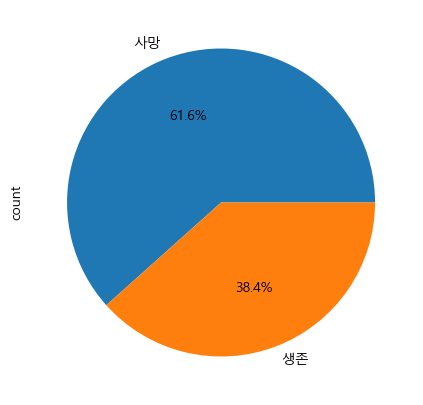

In [12]:
# 생존비율 확인
train["Survived"].value_counts()

plt.figure(figsize=(8, 5))
labels = ['사망', '생존']
train['Survived'].value_counts().plot.pie(autopct='%1.1f%%',  # 백분율(소수 첫째자리까지)
                                          labels=labels)

## 2-1. 성별에 따른 생존

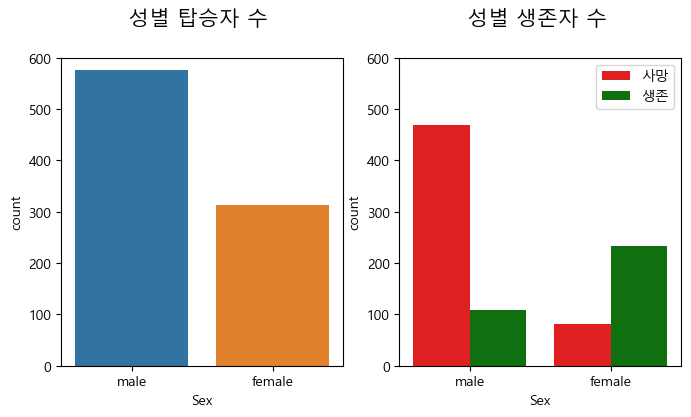

In [13]:
# 색상 변경
palette_colors = {0: 'red', 1: 'green'}

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].set_title("성별 탑승자 수 \n", size=15)
sns.countplot(x="Sex", data=train, ax=axes[0])
axes[0].set_ylim([0, 600])  # y축 범위 설정

axes[1].set_title("성별 생존자 수 \n", size=15)
sns.countplot(x="Sex", hue="Survived", data=train, ax=axes[1], palette=palette_colors)
axes[1].legend(labels=['사망', '생존'])
axes[1].set_ylim([0, 600])  # y축 범위 설정

plt.show()

In [14]:
# 성별 생존률
# 여성 생존률이 더 높음.
train[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


## 2-2. class에 따른 생존

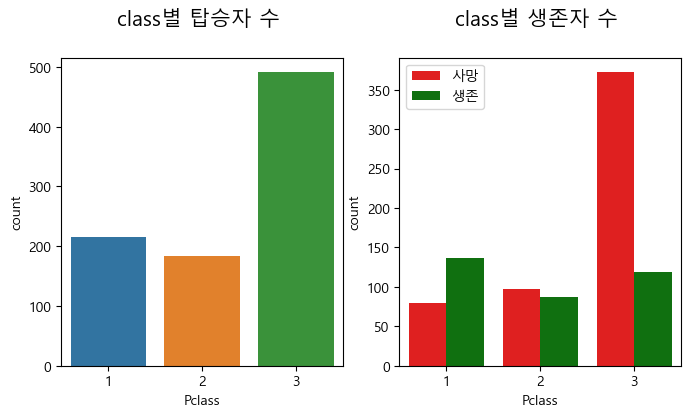

In [15]:
# 색상 변경
palette_colors = {0: 'red', 1: 'green'}

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].set_title("class별 탑승자 수 \n", size=15)
sns.countplot(x="Pclass", data=train, ax=axes[0])
#axes[0].set_ylim([0, 600])  # y축 범위 설정

axes[1].set_title("class별 생존자 수 \n", size=15)
sns.countplot(x="Pclass", hue="Survived", data=train, ax=axes[1], palette=palette_colors)
axes[1].legend(labels=['사망', '생존'])
#axes[1].set_ylim([0, 600])  # y축 범위 설정

In [16]:
# class별 생존률
# class1 생존률이 가장 높음.
train[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


## 2-3. 나이에 따른 생존

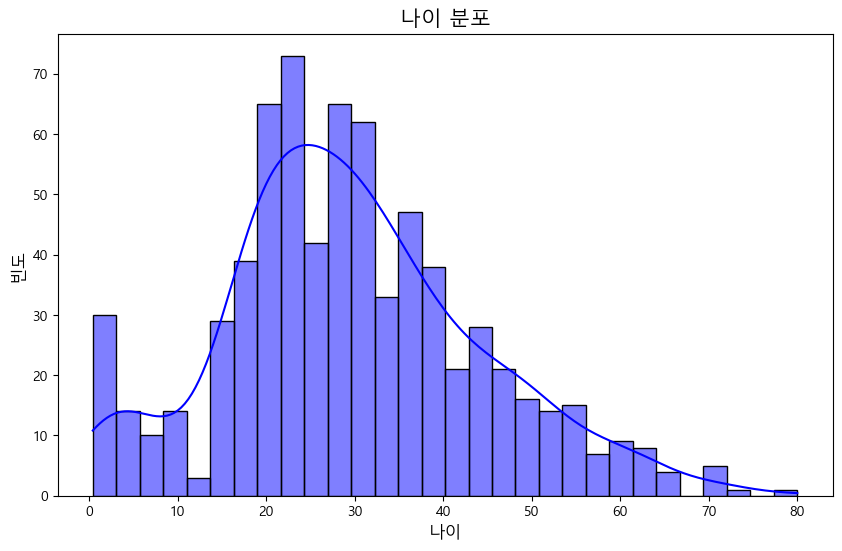

In [17]:
plt.figure(figsize=(10, 6))

# 히스토그램
sns.histplot(train['Age'].dropna(), bins=30, kde=True, color='blue')
plt.title('나이 분포', fontsize=15)
plt.xlabel('나이', fontsize=12)
plt.ylabel('빈도', fontsize=12)

plt.show()

In [18]:
# 최솟값
min_age = train['Age'].min()

# 최댓값
max_age = train['Age'].max()

# 중위값
median_age = train['Age'].median()

print("최솟값:", min_age)
print("최댓값:", max_age)
print("중위값:", median_age)

최솟값: 0.42
최댓값: 80.0
중위값: 28.0


In [19]:
# 나이대 구간 정의
age_bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89]
age_labels = [i for i in range(0, 90, 10)]

# 'Age_Group' 열을 생성하여 나이를 구간에 맞게 할당
train['Age_Group'] = pd.cut(train['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

print(train[['Age', 'Age_Group']].head(10))

    Age Age_Group
0  22.0        20
1  38.0        30
2  26.0        20
3  35.0        30
4  35.0        30
5   NaN       NaN
6  54.0        50
7   2.0         0
8  27.0        20
9  14.0        10


(0.0, 250.0)

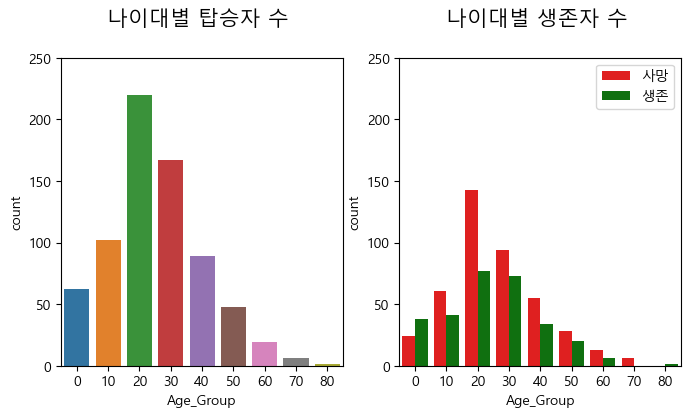

In [20]:
# 색상 변경
palette_colors = {0: 'red', 1: 'green'}

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].set_title("나이대별 탑승자 수 \n", size=15)
sns.countplot(x="Age_Group", data=train, ax=axes[0])
axes[0].set_ylim([0, 250])  # y축 범위 설정

axes[1].set_title("나이대별 생존자 수 \n", size=15)
sns.countplot(x="Age_Group", hue="Survived", data=train, ax=axes[1], palette=palette_colors)
axes[1].legend(labels=['사망', '생존'])
axes[1].set_ylim([0, 250])  # y축 범위 설정

In [21]:
# 나이대별 생존률
# 80대(1명)을 제외하면 0-9세 사람의 생존률이 가장 높음.
train[['Age_Group', 'Survived']].groupby('Age_Group').mean()

,Survived
Age_Group,
0,0.612903
10,0.401961
20,0.350000
30,0.437126
40,0.382022
50,0.416667
60,0.315789
70,0.000000
80,1.000000


## 2-4. SibSp에 따른 생존 (동승한 형제자매 또는 배우자 수)

(0.0, 650.0)

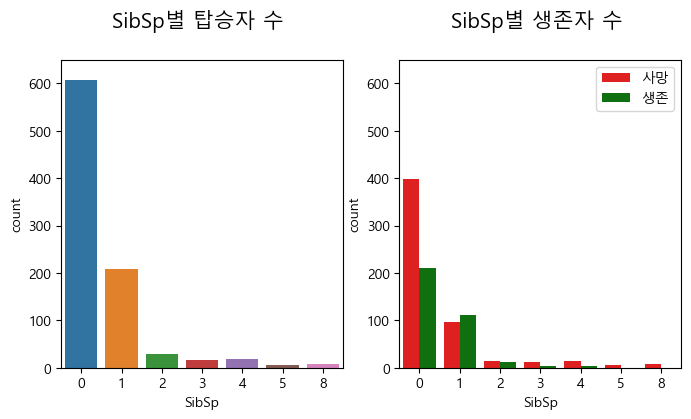

In [22]:
# 색상 변경
palette_colors = {0: 'red', 1: 'green'}

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].set_title("SibSp별 탑승자 수 \n", size=15)
sns.countplot(x="SibSp", data=train, ax=axes[0])
axes[0].set_ylim([0, 650])  # y축 범위 설정

axes[1].set_title("SibSp별 생존자 수 \n", size=15)
sns.countplot(x="SibSp", hue="Survived", data=train, ax=axes[1], palette=palette_colors)
axes[1].legend(labels=['사망', '생존'])
axes[1].set_ylim([0, 650])  # y축 범위 설정

In [23]:
# SibSp별 생존률
# 1명과 같이 동승한 경우 생존률이 가장 높음.
train[['SibSp', 'Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


## 2-5. Parch에 따른 생존 (동승한 부모 또는 자녀 수)

(0.0, 700.0)

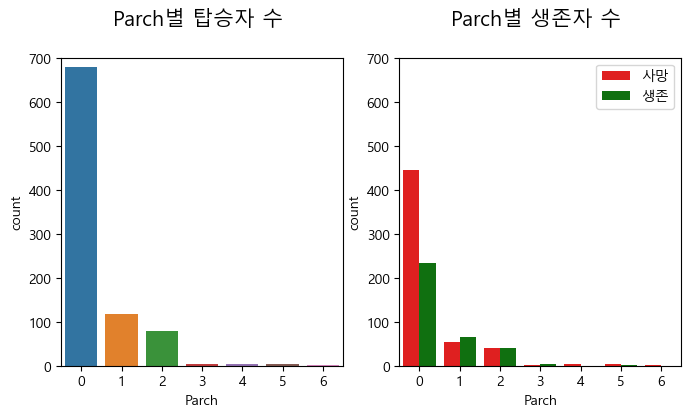

In [24]:
# 색상 변경
palette_colors = {0: 'red', 1: 'green'}

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].set_title("Parch별 탑승자 수 \n", size=15)
sns.countplot(x="Parch", data=train, ax=axes[0])
axes[0].set_ylim([0, 700])  # y축 범위 설정

axes[1].set_title("Parch별 생존자 수 \n", size=15)
sns.countplot(x="Parch", hue="Survived", data=train, ax=axes[1], palette=palette_colors)
axes[1].legend(labels=['사망', '생존'])
axes[1].set_ylim([0, 700])  # y축 범위 설정

In [25]:
# Parch별 생존률
# 3명과 같이 동승한 경우 생존률이 가장 높음.
train[['Parch', 'Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


## 2-6. 선실 번호에 따른 생존

In [26]:
# Cabin별 생존률
train[['Cabin', 'Survived']].groupby('Cabin').mean().sort_values(by='Survived', ascending=False)

,Survived
Cabin,
C62 C64,1.0
D21,1.0
D17,1.0
D19,1.0
C148,1.0
...,...
C46,0.0
C30,0.0
C128,0.0


## 2-7. Embarked에 따른 생존 (탑승 항구)

(0.0, 700.0)

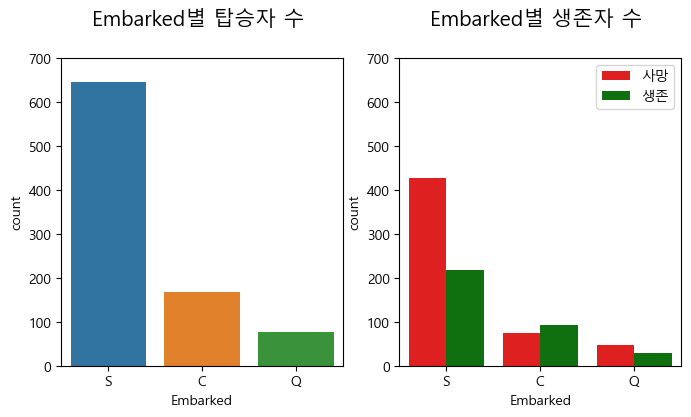

In [27]:
# 색상 변경
palette_colors = {0: 'red', 1: 'green'}

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].set_title("Embarked별 탑승자 수 \n", size=15)
sns.countplot(x="Embarked", data=train, ax=axes[0])
axes[0].set_ylim([0, 700])  # y축 범위 설정

axes[1].set_title("Embarked별 생존자 수 \n", size=15)
sns.countplot(x="Embarked", hue="Survived", data=train, ax=axes[1], palette=palette_colors)
axes[1].legend(labels=['사망', '생존'])
axes[1].set_ylim([0, 700])  # y축 범위 설정

In [28]:
# Embarked별 생존률
# 쉘 부르크(C)에서 탑승한 경우 생존률이 가장 높음.
train[['Embarked', 'Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


## 2-7-1. 항구별 탑승객 티켓 class

<Axes: >

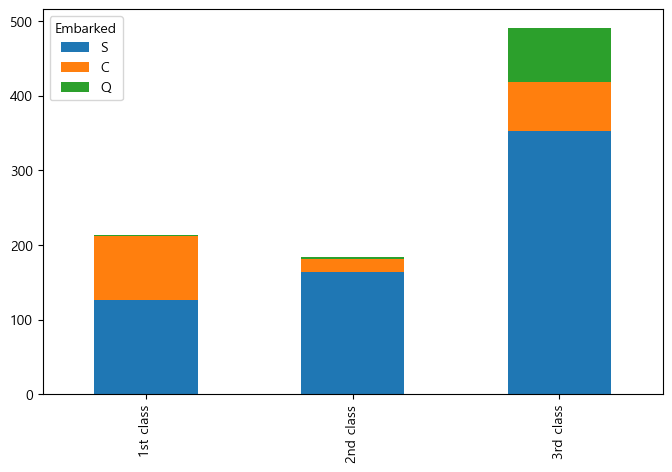

In [29]:
pc1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
pc2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
pc3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
pc = pd.DataFrame([pc1, pc2, pc3])
pc.index = ['1st class', '2nd class', '3rd class']

fig, ax = plt.subplots(figsize=(8, 5))
pc.plot(kind='bar', stacked=True, ax=ax)

모든 class에서 사우스햄튼(S) 탑승객이 과반수 이상을 차지.

## 2-8. Fare에 따른 생존

In [30]:
# 최솟값
min_fare = train['Fare'].min()

# 최댓값
max_fare = train['Fare'].max()

# 중위값
median_fare = train['Fare'].median()

print("최솟값:", min_fare)
print("최댓값:", max_fare)
print("중위값:", median_fare)

최솟값: 0.0
최댓값: 512.3292
중위값: 14.4542


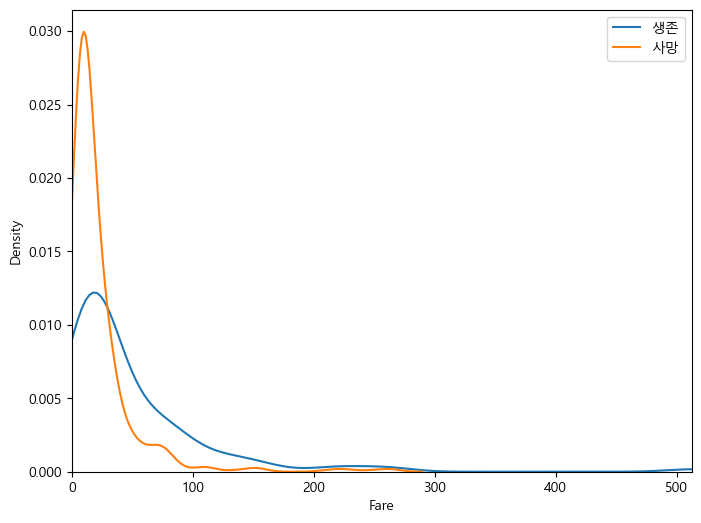

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
 
# 분포 확인
sns.kdeplot(train[train['Survived']==1]['Fare'], ax=ax)
sns.kdeplot(train[train['Survived']==0]['Fare'], ax=ax)
 
# 축 범위
ax.set(xlim=(0, train['Fare'].max()))
ax.legend(['생존', '사망'])
 
plt.show()

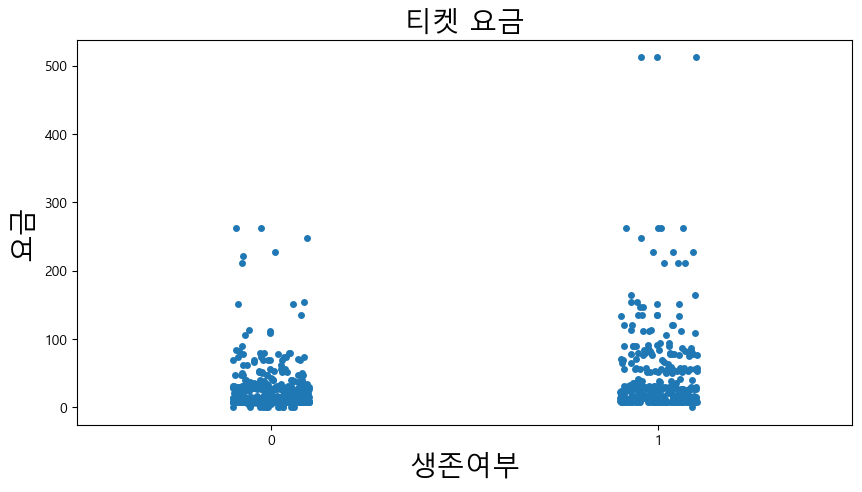

In [32]:
plt.figure(figsize = (10,5))
plt.title('티켓 요금',fontsize = 20)
sns.stripplot(x = 'Survived', y = 'Fare', data = train, jitter = True)
plt.xlabel('생존여부', fontsize = 20)
plt.ylabel('요금', fontsize = 20)

plt.show()

#0: 사망, 1: 생존

가장 높은 가격을 지불한 사람들은 생존함.

# Feature Engineering

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Age_Group    714 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.9+ KB


In [34]:
# 생존률과 관계없어보이는 열 삭제
df_train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age_Group'], axis = 1)
df_test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

### 성별 int로 바꾸기 (남: 0, 여: 1)

In [35]:
df_train['Sex'] = df_train['Sex'].astype('category').cat.codes
df_test['Sex'] = df_test['Sex'].astype('category').cat.codes

In [36]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [37]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

### 선상항구 결측치 채우기

In [38]:
# 결측치가 2개 존재했기에, 가장 많았던 S로 채움
df_train['Embarked'].fillna('S', inplace=True)

### 선상항구 숫자로 바꾸기 

In [39]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [40]:
# 'Embarked' 열을 원핫인코딩으로 변환
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

# 변환된 데이터 확인
print("Train 데이터의 원핫인코딩 결과:")
df_train.head()

print("\nTest 데이터의 원핫인코딩 결과:")
df_test.head()

Train 데이터의 원핫인코딩 결과:

Test 데이터의 원핫인코딩 결과:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,False,True,False
1,3,0,47.0,1,0,7.0000,False,False,True
2,2,1,62.0,0,0,9.6875,False,True,False
3,3,1,27.0,0,0,8.6625,False,False,True
4,3,0,22.0,1,1,12.2875,False,False,True


### 나이 결측치 채우기

In [41]:
# 'Sex'와 'Embarked' 값에 따른 'Age'의 평균 계산
average_age = train.groupby(['Sex', 'Embarked'])['Age'].mean()

# 각각의 평균을 반올림한 후 정수로 변환
c_m = int(round(average_age['male', 'C']))
c_fm = int(round(average_age['female', 'C']))
q_m = int(round(average_age['male', 'Q']))
q_fm = int(round(average_age['female', 'Q']))
s_m = int(round(average_age['male', 'S']))
s_fm = int(round(average_age['female', 'S']))

# 결과
print("C일때의 남성 평균 나이값:", c_m)
print("C일때의 여성 평균 나이값:", c_fm)
print("Q일때의 남성 평균 나이값:", q_m)
print("Q일때의 여성 평균 나이값:", q_fm)
print("S일때의 남성 평균 나이값:", s_m)
print("S일때의 여성 평균 나이값:", s_fm)

C일때의 남성 평균 나이값: 33
C일때의 여성 평균 나이값: 28
Q일때의 남성 평균 나이값: 31
Q일때의 여성 평균 나이값: 24
S일때의 남성 평균 나이값: 30
S일때의 여성 평균 나이값: 28


In [42]:
# df_train
# 조건에 맞는 행 선택
condition_c_m = (df_train['Age'].isnull()) & (df_train['Sex'] == 0) & (df_train['Embarked_C'] == 1)
condition_c_fm = (df_train['Age'].isnull()) & (df_train['Sex'] == 1) & (df_train['Embarked_C'] == 1)
condition_q_m = (df_train['Age'].isnull()) & (df_train['Sex'] == 0) & (df_train['Embarked_Q'] == 1)
condition_q_fm = (df_train['Age'].isnull()) & (df_train['Sex'] == 1) & (df_train['Embarked_Q'] == 1)
condition_s_m = (df_train['Age'].isnull()) & (df_train['Sex'] == 0) & (df_train['Embarked_S'] == 1)
condition_s_fm = (df_train['Age'].isnull()) & (df_train['Sex'] == 1) & (df_train['Embarked_S'] == 1)

# 조건에 맞는 행을 찾아 결측값 채워주기
df_train.loc[condition_c_m, 'Age'] = c_m
df_train.loc[condition_c_fm, 'Age'] = c_fm
df_train.loc[condition_q_m, 'Age'] = q_m
df_train.loc[condition_q_fm, 'Age'] = q_fm
df_train.loc[condition_s_m, 'Age'] = s_m
df_train.loc[condition_s_fm, 'Age'] = s_fm

In [43]:
# df_test
# 조건에 맞는 행 선택
condition_c_m = (df_test['Age'].isnull()) & (df_test['Sex'] == 0) & (df_test['Embarked_C'] == 1)
condition_c_fm = (df_test['Age'].isnull()) & (df_test['Sex'] == 1) & (df_test['Embarked_C'] == 1)
condition_q_m = (df_test['Age'].isnull()) & (df_test['Sex'] == 0) & (df_test['Embarked_Q'] == 1)
condition_q_fm = (df_test['Age'].isnull()) & (df_test['Sex'] == 1) & (df_test['Embarked_Q'] == 1)
condition_s_m = (df_test['Age'].isnull()) & (df_test['Sex'] == 0) & (df_test['Embarked_S'] == 1)
condition_s_fm = (df_test['Age'].isnull()) & (df_test['Sex'] == 1) & (df_test['Embarked_S'] == 1)

# 조건에 맞는 행을 찾아 결측값 채워주기
df_test.loc[condition_c_m, 'Age'] = c_m
df_test.loc[condition_c_fm, 'Age'] = c_fm
df_test.loc[condition_q_m, 'Age'] = q_m
df_test.loc[condition_q_fm, 'Age'] = q_fm
df_test.loc[condition_s_m, 'Age'] = s_m
df_test.loc[condition_s_fm, 'Age'] = s_fm

## 나이 구간으로 나누기

In [44]:
# 카테고리화
train['AgeRange'] = pd.cut(train['Age'], 5)
train[['AgeRange', 'Survived']].groupby(['AgeRange']).mean()

,Survived
AgeRange,
"(0.34, 16.336]",0.550000
"(16.336, 32.252]",0.369942
"(32.252, 48.168]",0.404255
"(48.168, 64.084]",0.434783
"(64.084, 80.0]",0.090909


In [45]:
for data in [df_train, df_test]:
    data.loc[data['Age'] <= 9, 'Age'] = 0
    data.loc[(data['Age'] > 9) & (data['Age'] <= 19), 'Age'] = 1
    data.loc[(data['Age'] > 19) & (data['Age'] <= 29), 'Age'] = 2
    data.loc[(data['Age'] > 29) & (data['Age'] <= 39), 'Age'] = 3
    data.loc[(data['Age'] > 39) & (data['Age'] <= 49), 'Age'] = 4
    data.loc[(data['Age'] > 39) & (data['Age'] <= 59), 'Age'] = 5
    data.loc[(data['Age'] > 59) & (data['Age'] <= 69), 'Age'] = 6
    data.loc[data['Age'] > 69, 'Age'] = 7

## Fare 결측치 채우기

In [46]:
# 결측치가 있는 행 선택
missing_fare_condition = df_test['Fare'].isnull()

# 결측치가 있는 행의 'Pclass' 값을 확인
missing_pclass = df_test.loc[missing_fare_condition, 'Pclass']

# 'Pclass'에 해당하는 행들의 'Fare' 중앙값 계산
median_fares = df_test.groupby('Pclass')['Fare'].median()

# 결측치를 중앙값으로 대체
df_test.loc[missing_fare_condition, 'Fare'] = missing_pclass.map(median_fares)

## 동승한 가족 수로 합치기

In [47]:
df_train['Family'] = df_train['SibSp'] + df_train['Parch']
df_test['Family'] = df_train['SibSp'] + df_train['Parch']

In [48]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Family        0
dtype: int64

In [49]:
df_test.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Family        0
dtype: int64

In [50]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Family
0,0,3,1,2.0,1,0,7.2500,False,False,True,1
1,1,1,0,3.0,1,0,71.2833,True,False,False,1
2,1,3,0,2.0,0,0,7.9250,False,False,True,0
3,1,1,0,3.0,1,0,53.1000,False,False,True,1
4,0,3,1,3.0,0,0,8.0500,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,2.0,0,0,13.0000,False,False,True,0
887,1,1,0,1.0,0,0,30.0000,False,False,True,0
888,0,3,0,3.0,1,2,23.4500,False,False,True,3
889,1,1,1,2.0,0,0,30.0000,True,False,False,0


In [51]:
df_train = df_train.drop(['SibSp', 'Parch'], axis = 1)
df_test = df_test.drop(['SibSp', 'Parch'], axis = 1)

In [52]:
df_train

,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Family
0,0,3,1,2.0,7.2500,False,False,True,1
1,1,1,0,3.0,71.2833,True,False,False,1
2,1,3,0,2.0,7.9250,False,False,True,0
3,1,1,0,3.0,53.1000,False,False,True,1
4,0,3,1,3.0,8.0500,False,False,True,0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,2.0,13.0000,False,False,True,0
887,1,1,0,1.0,30.0000,False,False,True,0
888,0,3,0,3.0,23.4500,False,False,True,3
889,1,1,1,2.0,30.0000,True,False,False,0


In [53]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Family        0
dtype: int64

## Correlation Heat Map 상관 관계 히트맵

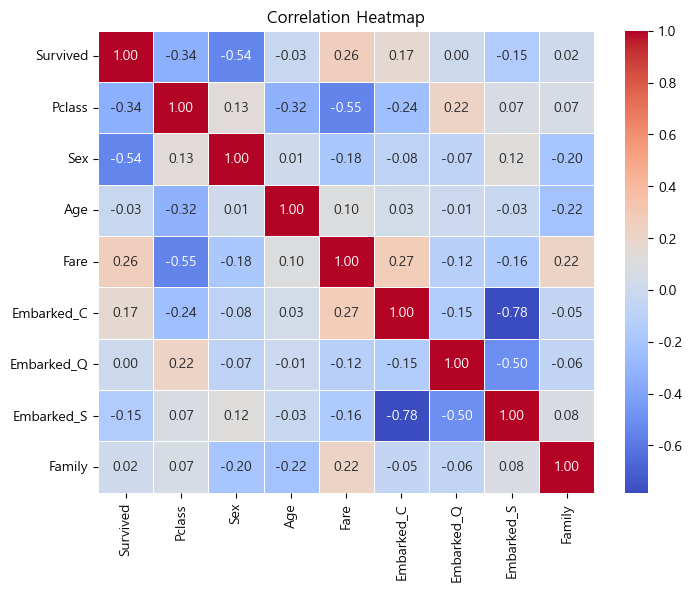

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# train 데이터의 코릴레이션 행렬 계산
correlation_matrix = df_train.corr()

# 코릴레이션 히트맵 생성
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# 표준화 및 정규화

In [55]:
# 표준화 : 평균 = 0, 표준편차 = 1
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
standard_scaler = StandardScaler()

# 'Fare' 열에 대해서만 표준화 수행
df_train['Fare'] = standard_scaler.fit_transform(df_train[['Fare']])

# 테스트 데이터에 대한 표준화
df_test['Fare'] = standard_scaler.transform(df_test[['Fare']])

In [56]:
# 정규화 : [0,1]
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
minmax_scaler = MinMaxScaler()

# 'Fare' 열에 대해서만 정규화 수행
df_train['Fare'] = minmax_scaler.fit_transform(df_train[['Fare']])

# 테스트 데이터에 대한 정규화
df_test['Fare'] = minmax_scaler.transform(df_test[['Fare']])

In [57]:
df_train

,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Family
0,0,3,1,2.0,0.014151,False,False,True,1
1,1,1,0,3.0,0.139136,True,False,False,1
2,1,3,0,2.0,0.015469,False,False,True,0
3,1,1,0,3.0,0.103644,False,False,True,1
4,0,3,1,3.0,0.015713,False,False,True,0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,2.0,0.025374,False,False,True,0
887,1,1,0,1.0,0.058556,False,False,True,0
888,0,3,0,3.0,0.045771,False,False,True,3
889,1,1,1,2.0,0.058556,True,False,False,0


# 모델 학습

In [58]:
train_input = df_train.drop('Survived', axis=1).values
train_target = df_train['Survived'].values
print(train_input.shape, train_target.shape)  #(891, 7) (891,)

(891, 8) (891,)


## KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# 사용할 평가 지표들 정의
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

model = KNeighborsClassifier()
score = cross_validate(model, train_input, train_target,
                      scoring=scoring, return_train_score=True, n_jobs=-1,
                      cv=StratifiedKFold())

# 출력
print("Train Accuracy:", np.mean(score['train_accuracy']))
print("Test Accuracy:", np.mean(score['test_accuracy']))

print("Train Precision:", np.mean(score['train_precision']))
print("Test Precision:", np.mean(score['test_precision']))

print("Train Recall:", np.mean(score['train_recall']))
print("Test Recall:", np.mean(score['test_recall']))

print("Train F1:", np.mean(score['train_f1']))
print("Test F1:", np.mean(score['test_f1']))

Train Accuracy: 0.8529752430779898
Test Accuracy: 0.7811813445483649
Train Precision: 0.8361363212203792
Test Precision: 0.735711809976815
Train Recall: 0.7675516697414506
Test Recall: 0.6811594202898551
Train F1: 0.8002815045163606
Test F1: 0.7050858367200048


## KNN(최적의 하이퍼파라미터)

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 예측에 사용할 특성(feature) 선택
features = ['Pclass', 'Sex', 'Age', 'Family', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

# 'df_train'에서 예측에 사용할 특성과 예측 대상인 'Survived' 열 선택
X = df_train[features]
y = df_train['Survived']

# 훈련 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN 모델 생성
knn_model = KNeighborsClassifier()

# 탐색할 하이퍼파라미터 값들 정의
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 찾기
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# 테스트 데이터로 예측
y_pred = grid_search.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Optimized KNN Model Accuracy: {accuracy:.4f}')

# Best Hyperparameters: {'n_neighbors': 9}
# Optimized KNN Model Accuracy: 0.8045

Best Hyperparameters: {'n_neighbors': 9}
Optimized KNN Model Accuracy: 0.8045


In [61]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# 사용할 평가 지표들 정의
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

model = KNeighborsClassifier(n_neighbors=9)
score = cross_validate(model, train_input, train_target,
                      scoring=scoring,
                      return_train_score=True, n_jobs=-1,
                      cv=StratifiedKFold())

print("Train Accuracy:", np.mean(score['train_accuracy']))
print("Test Accuracy:", np.mean(score['test_accuracy']))

print("Train Precision:", np.mean(score['train_precision']))
print("Test Precision:", np.mean(score['test_precision']))

print("Train Recall:", np.mean(score['train_recall']))
print("Test Recall:", np.mean(score['test_recall']))

print("Train F1:", np.mean(score['train_f1']))
print("Test F1:", np.mean(score['test_f1']))

Train Accuracy: 0.8310911325779662
Test Accuracy: 0.7968928504174252
Train Precision: 0.8146914142955538
Test Precision: 0.7790078496649739
Train Recall: 0.7251651025373652
Test Recall: 0.6639386189258312
Train F1: 0.7670599794431803
Test F1: 0.7154499982202009


## RandomForestClassifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# 사용할 평가 지표들 정의
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

model = RandomForestClassifier()
score = cross_validate(model, train_input, train_target,
                      scoring=scoring,
                      return_train_score=True, n_jobs=-1,
                      cv=StratifiedKFold())

print("Train Accuracy:", np.mean(score['train_accuracy']))
print("Test Accuracy:", np.mean(score['test_accuracy']))

print("Train Precision:", np.mean(score['train_precision']))
print("Test Precision:", np.mean(score['test_precision']))

print("Train Recall:", np.mean(score['train_recall']))
print("Test Recall:", np.mean(score['test_recall']))

print("Train F1:", np.mean(score['train_f1']))
print("Test F1:", np.mean(score['test_f1']))

Train Accuracy: 0.952018689821454
Test Accuracy: 0.8081036971941499
Train Precision: 0.9534281805943232
Test Precision: 0.760535608182667
Train Recall: 0.9203283334670196
Test Recall: 0.7336317135549872
Train F1: 0.9364514140319826
Test F1: 0.744840640752934


## RandomForestClassifier(최적의 하이퍼파라미터)

In [63]:
# 예측에 사용할 특성(feature) 선택
features = ['Pclass', 'Sex', 'Age', 'Family', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

# 'df_train'에서 예측에 사용할 특성과 예측 대상인 'Survived' 열 선택
X = df_train[features]
y = df_train['Survived']

# 훈련 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestClassifier 모델 생성
rf_model = RandomForestClassifier(random_state=42)

# 탐색할 하이퍼파라미터 값들 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 찾기
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# 테스트 데이터로 예측
y_pred = grid_search.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Optimized RandomForest Model Accuracy: {accuracy:.4f}')
# Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
# Optimized RandomForest Model Accuracy: 0.8436

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Optimized RandomForest Model Accuracy: 0.8212


## Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# 사용할 평가 지표들 정의
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

model = DecisionTreeClassifier()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      scoring=scoring,
                      cv = StratifiedKFold())

print("Train Accuracy:", np.mean(score['train_accuracy']))
print("Test Accuracy:", np.mean(score['test_accuracy']))

print("Train Precision:", np.mean(score['train_precision']))
print("Test Precision:", np.mean(score['test_precision']))

print("Train Recall:", np.mean(score['train_recall']))
print("Test Recall:", np.mean(score['test_recall']))

print("Train F1:", np.mean(score['train_f1']))
print("Test F1:", np.mean(score['test_f1']))

Train Accuracy: 0.9525796996391257
Test Accuracy: 0.805881614462369
Train Precision: 0.970216244427446
Test Precision: 0.7660086397665805
Train Recall: 0.9042405283281196
Test Recall: 0.713384484228474
Train F1: 0.936050842028832
Test F1: 0.7376021169130041


## Decision Tree(최적의 하이퍼파라미터)

In [65]:
# 예측에 사용할 특성(feature) 선택
features = ['Pclass', 'Sex', 'Age', 'Family', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

# 'df_train'에서 예측에 사용할 특성과 예측 대상인 'Survived' 열 선택
X = df_train[features]
y = df_train['Survived']

# 훈련 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DecisionTreeClassifier 모델 생성
dt_model = DecisionTreeClassifier(random_state=42)

# 탐색할 하이퍼파라미터 값들 정의
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 찾기
grid_search_dt = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params_dt = grid_search_dt.best_params_
print(f'Best Hyperparameters for Decision Tree: {best_params_dt}')

# 테스트 데이터로 예측
y_pred_dt = grid_search_dt.predict(X_test)

# 정확도 평가
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Optimized Decision Tree Model Accuracy: {accuracy_dt:.4f}')

Best Hyperparameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Optimized Decision Tree Model Accuracy: 0.8324


## GradientBoosting

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# 사용할 평가 지표들 정의
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

model = GradientBoostingClassifier()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      scoring=scoring,
                      cv = StratifiedKFold())

print("Train Accuracy:", np.mean(score['train_accuracy']))
print("Test Accuracy:", np.mean(score['test_accuracy']))

print("Train Precision:", np.mean(score['train_precision']))
print("Test Precision:", np.mean(score['test_precision']))

print("Train Recall:", np.mean(score['train_recall']))
print("Test Recall:", np.mean(score['test_recall']))

print("Train F1:", np.mean(score['train_f1']))
print("Test F1:", np.mean(score['test_f1']))

Train Accuracy: 0.8953417274689948
Test Accuracy: 0.8327976900382901
Train Precision: 0.908145744566719
Test Precision: 0.8200608431116907
Train Recall: 0.809197615037031
Test Recall: 0.7248934356351235
Train F1: 0.855732360932749
Test F1: 0.7679251173642131


## Gradient Boosting(최적의 하이퍼파라미터)

In [67]:
# 예측에 사용할 특성(feature) 선택
features = ['Pclass', 'Sex', 'Age', 'Family', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

# 'df_train'에서 예측에 사용할 특성과 예측 대상인 'Survived' 열 선택
X = df_train[features]
y = df_train['Survived']

# 훈련 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GradientBoostingClassifier 모델 생성
gb_model = GradientBoostingClassifier(random_state=42)

# 탐색할 하이퍼파라미터 값들 정의
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 찾기
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params_gb = grid_search_gb.best_params_
print(f'Best Hyperparameters for Gradient Boosting: {best_params_gb}')

# 테스트 데이터로 예측
y_pred_gb = grid_search_gb.predict(X_test)

# 정확도 평가
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Optimized Gradient Boosting Model Accuracy: {accuracy_gb:.4f}')

Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Optimized Gradient Boosting Model Accuracy: 0.7933


## HistGradientBoosting

In [68]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# 사용할 평가 지표들 정의
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

model = HistGradientBoostingClassifier()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      scoring=scoring,
                      cv = StratifiedKFold())

print("Train Accuracy:", np.mean(score['train_accuracy']))
print("Test Accuracy:", np.mean(score['test_accuracy']))

print("Train Precision:", np.mean(score['train_precision']))
print("Test Precision:", np.mean(score['test_precision']))

print("Train Recall:", np.mean(score['train_recall']))
print("Test Recall:", np.mean(score['test_recall']))

print("Train F1:", np.mean(score['train_f1']))
print("Test F1:", np.mean(score['test_f1']))

Train Accuracy: 0.9183490395070677
Test Accuracy: 0.8339275626137719
Train Precision: 0.9184488567128859
Test Precision: 0.815047795605002
Train Recall: 0.8640330472447261
Test Recall: 0.7338022165387894
Train F1: 0.8903868665371792
Test F1: 0.7705815362376829


## HistGradientBoosting(최적의 하이퍼파라미터)

In [69]:
# 예측에 사용할 특성(feature) 선택
features = ['Pclass', 'Sex', 'Age', 'Family', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

# 'df_train'에서 예측에 사용할 특성과 예측 대상인 'Survived' 열 선택
X = df_train[features]
y = df_train['Survived']

# 훈련 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# HistGradientBoostingClassifier 모델 생성
hgb_model = HistGradientBoostingClassifier(random_state=42)

# 탐색할 하이퍼파라미터 값들 정의
param_grid_hgb = {
    'max_iter': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 찾기
grid_search_hgb = GridSearchCV(hgb_model, param_grid_hgb, cv=5, scoring='accuracy')
grid_search_hgb.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params_hgb = grid_search_hgb.best_params_
print(f'Best Hyperparameters for HistGradientBoosting: {best_params_hgb}')

# 테스트 데이터로 예측
y_pred_hgb = grid_search_hgb.predict(X_test)

# 정확도 평가
accuracy_hgb = accuracy_score(y_test, y_pred_hgb)
print(f'Optimized HistGradientBoosting Model Accuracy: {accuracy_hgb:.4f}')

Best Hyperparameters for HistGradientBoosting: {'learning_rate': 0.2, 'max_depth': 4, 'max_iter': 50}
Optimized HistGradientBoosting Model Accuracy: 0.7989


## Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# 사용할 평가 지표들 정의
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

model = GaussianNB()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      scoring=scoring,
                      cv = StratifiedKFold())

print("Train Accuracy:", np.mean(score['train_accuracy']))
print("Test Accuracy:", np.mean(score['test_accuracy']))

print("Train Precision:", np.mean(score['train_precision']))
print("Test Precision:", np.mean(score['test_precision']))

print("Train Recall:", np.mean(score['train_recall']))
print("Test Recall:", np.mean(score['test_recall']))

print("Train F1:", np.mean(score['train_f1']))
print("Test F1:", np.mean(score['test_f1']))

# 튜닝할 하이퍼파라미터 존재X

Train Accuracy: 0.7923684542288478
Test Accuracy: 0.7823802648923482
Train Precision: 0.7525623072330434
Test Precision: 0.7408335332911603
Train Recall: 0.6885644768856449
Test Recall: 0.6613384484228474
Train F1: 0.7173268495662041
Test F1: 0.6957177043801829


## LightGBM

In [71]:
from lightgbm import LGBMClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# 사용할 평가 지표들 정의
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

model = LGBMClassifier()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      scoring=scoring,
                      cv = StratifiedKFold())

print("Train Accuracy:", np.mean(score['train_accuracy']))
print("Test Accuracy:", np.mean(score['test_accuracy']))

print("Train Precision:", np.mean(score['train_precision']))
print("Test Precision:", np.mean(score['test_precision']))

print("Train Recall:", np.mean(score['train_recall']))
print("Test Recall:", np.mean(score['test_recall']))

print("Train F1:", np.mean(score['train_f1']))
print("Test F1:", np.mean(score['test_f1']))

Train Accuracy: 0.91947145310998
Test Accuracy: 0.8350260498399347
Train Precision: 0.9233705546346302
Test Precision: 0.801532250154418
Train Recall: 0.8618405924975268
Test Recall: 0.760144927536232
Train F1: 0.8914918421544075
Test F1: 0.7790438840547674


## LightGBM(최적의 하이퍼파라미터)

In [72]:
# 예측에 사용할 특성(feature) 선택
features = ['Pclass', 'Sex', 'Age', 'Family', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

# 'df_train'에서 예측에 사용할 특성과 예측 대상인 'Survived' 열 선택
X = df_train[features]
y = df_train['Survived']

# 훈련 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 모델 생성
lgb_model = LGBMClassifier(random_state=42)

# 탐색할 하이퍼파라미터 값들 정의
param_grid_lgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 찾기
grid_search_lgb = GridSearchCV(lgb_model, param_grid_lgb, cv=5, scoring='accuracy')
grid_search_lgb.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params_lgb = grid_search_lgb.best_params_
print(f'Best Hyperparameters for LightGBM: {best_params_lgb}')

# 테스트 데이터로 예측
y_pred_lgb = grid_search_lgb.predict(X_test)

# 정확도 평가
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f'Optimized LightGBM Model Accuracy: {accuracy_lgb:.4f}')
# Best Hyperparameters for LightGBM: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
# Optimized LightGBM Model Accuracy: 0.8045

[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Info] Number of positive: 215, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 132
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377193 -> initscore=-0.501480
[LightGBM] [Info] Start training from score -0.501480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Info] Number of positive: 215, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 132
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377193 -> initscore=-0.501480
[LightGBM] [Info] Start training from score -0.501480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 215, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.00007

[LightGBM] [Info] Number of positive: 215, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 132
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377193 -> initscore=-0.501480
[LightGBM] [Info] Start training from score -0.501480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Info] Number of positive: 215, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 127
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377193 -> initscore=-0.501480
[LightGBM] [Info] Start training from score -0.501480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Info] Number of positive: 215, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 127
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377193 -> initscore=-0.501480
[LightGBM] [Info] Start training from score -0.501480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 214, number of negative: 356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375439 -> initscore=-0.508955
[LightGBM] [Info] Start training from score -0.508955
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accu

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 130

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 215, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 132
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377193 -> initscore=-0.501480
[LightGBM] [Info] Start training from score -0.501480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Info] Number of positive: 215, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 127
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377193 -> initscore=-0.501480
[LightGBM] [Info] Start training from score -0.501480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Info] Number of positive: 214, number of negative: 356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375439 -> initscore=-0.508955
[LightGBM] [Info] Start training from score -0.508955
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 130
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

Best Hyperparameters for LightGBM: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Optimized LightGBM Model Accuracy: 0.8101


## Support Vector Machine

In [73]:
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# 사용할 평가 지표들 정의
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

model = SVC()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      scoring=scoring,
                      cv = StratifiedKFold())

print("Train Accuracy:", np.mean(score['train_accuracy']))
print("Test Accuracy:", np.mean(score['test_accuracy']))

print("Train Precision:", np.mean(score['train_precision']))
print("Test Precision:", np.mean(score['test_precision']))

print("Train Recall:", np.mean(score['train_recall']))
print("Test Recall:", np.mean(score['test_recall']))

print("Train F1:", np.mean(score['train_f1']))
print("Test F1:", np.mean(score['test_f1']))

Train Accuracy: 0.828843153631593
Test Accuracy: 0.8260310087251271
Train Precision: 0.8133184060350589
Test Precision: 0.812479118475838
Train Recall: 0.7192829068741478
Test Recall: 0.7132992327365729
Train F1: 0.76333130733269
Test F1: 0.7579994513687944


## Support Vector Machine(최적의 하이퍼파라미터)

그리드 서치는 너무 오래걸려서 랜덤 서치로 진행

In [74]:
# 랜덤 서치
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from scipy.stats import uniform, randint

# SVC 모델 생성
svm_model = SVC()

# 탐색할 하이퍼파라미터 분포 설정
param_dist = {'C': uniform(0.1, 10),
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Randomized Search 객체 생성
random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist, n_iter=10, cv=StratifiedKFold(), scoring='accuracy', n_jobs=-1, random_state=42)

# Randomized Search 수행
random_search.fit(train_input, train_target)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", random_search.best_params_)

# 최적의 모델 저장
best_svm_model = random_search.best_estimator_

Best Hyperparameters: {'C': 8.424426408004217, 'kernel': 'rbf'}


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 예측에 사용할 특성(feature) 선택
features = ['Pclass', 'Sex', 'Age', 'Family', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

# 'df_train'에서 예측에 사용할 특성과 예측 대상인 'Survived' 열 선택
input_data = df_train[features]
target_data = df_train['Survived']

# 훈련 데이터로 분할
train_input, test_input, train_target, test_target = train_test_split(input_data, target_data, test_size=0.2, random_state=42)

# 테스트 데이터에 대한 예측 수행
test_predictions = best_svm_model.predict(test_input)

# 정확도 출력
accuracy = accuracy_score(test_target, test_predictions)
print("Accuracy:", accuracy)

# 정밀도 출력
precision = precision_score(test_target, test_predictions)
print("Precision:", precision)

# 재현율 출력
recall = recall_score(test_target, test_predictions)
print("Recall:", recall)

# F1 score 출력
f1 = f1_score(test_target, test_predictions)
print("F1 Score:", f1)

# 분류 보고서 출력
classification_rep = classification_report(test_target, test_predictions)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.776536312849162
Precision: 0.75
Recall: 0.6891891891891891
F1 Score: 0.7183098591549296
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       105
           1       0.75      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



In [76]:
# # 그리드 서치
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# from sklearn.model_selection import StratifiedKFold

# # SVC 모델 생성
# svm_model = SVC()

# # 탐색할 하이퍼파라미터 범위 설정
# param_grid = {'C': [0.1, 1, 10, 100],
#               'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# # Grid Search 객체 생성
# grid_search = GridSearchCV(svm_model, param_grid, cv=StratifiedKFold(), scoring='accuracy', n_jobs=-1)

# # Grid Search 수행
# grid_search.fit(train_input, train_target)

# # 최적의 하이퍼파라미터 출력
# print("Best Hyperparameters:", grid_search.best_params_)

# # 최적의 모델 저장
# best_svm_model = grid_search.best_estimator_

# 최종모델

## SVM

In [77]:
from sklearn.svm import SVC

# 최적의 하이퍼파라미터를 사용하여 SVM 모델 생성
svm_model = SVC(C=8.424426408004217, kernel='rbf')

# 훈련 데이터로 모델 훈련
svm_model.fit(train_input, train_target)

# 테스트 데이터에 대한 예측 수행
test_input = df_test.values
pred = svm_model.predict(test_input)

# 예측 결과를 submission DataFrame의 'Survived' 열에 할당
submission['Survived'] = pred

# submission DataFrame 출력
print(submission)

In [78]:
submission.to_csv("submission_result.csv", index=False)

## 다른 모델

In [79]:
# 최적의 하이퍼파라미터를 사용하여 모델 생성
model = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 2, min_samples_split = 10)

# 훈련 데이터로 모델 훈련
model.fit(train_input, train_target)

# 테스트 데이터에 대한 예측 수행
test_input = df_test.values
pred = model.predict(test_input)

# 예측 결과를 submission DataFrame의 'Survived' 열에 할당
submission['Survived'] = pred

# submission DataFrame 출력
print(submission)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
